In [1]:
pip install jenkspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.1/523.1 kB 24.1 MB/s eta 0:00:00


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import MinMaxScaler
import jenkspy

import seaborn as sns
import matplotlib.pylab as plt
import copy

In [3]:
df = pd.read_csv('polls_us_election_2016.csv')
df_clean = copy.deepcopy(df)
df

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN
3,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,Virginia,2016-09-16,2016-09-22,Ipsos,A-,452.0,lv,46.54,40.04,NaN,NaN,46.47852,40.48017,NaN,NaN
4204,Wisconsin,2016-08-04,2016-08-07,Marquette University,A,683.0,lv,47.00,34.00,9.00,NaN,48.74781,39.07778,4.705020,NaN
4205,Utah,2016-11-01,2016-11-07,Google Consumer Surveys,B,286.0,lv,21.33,35.05,9.99,NaN,26.65200,40.57738,9.705791,NaN
4206,Oregon,2016-10-21,2016-11-02,Ipsos,A-,446.0,lv,46.46,37.41,NaN,NaN,45.12949,37.10720,NaN,NaN


# Data Cleaning

In [4]:
df_clean = pd.get_dummies(df_clean, columns=['population'], prefix = 'pop_type_')

In [5]:
df_clean['grade'] = np.where(df_clean['grade'] == "A+", 10, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "A", 9, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "A-", 8, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "B+", 7, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "B", 6, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "B-", 5, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "C+", 4, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "C", 3, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "C-", 2, df_clean['grade'])
df_clean['grade'] = np.where(df_clean['grade'] == "D", 1, df_clean['grade'])

df_clean['grade'] = np.where(df_clean['grade'].isna(), 4, df_clean['grade'])

scaler = MinMaxScaler()
df_clean[['grade']] = scaler.fit_transform(df_clean[['grade']])

In [6]:
df_clean["startdate"] = df_clean.apply (lambda x: pd.Timestamp(x["startdate"]), axis=1)
df_clean["enddate"] = df_clean.apply (lambda x: pd.Timestamp(x["enddate"]), axis=1)

In [32]:
df_clean.isna().sum()

state                  0
startdate              0
enddate                0
pollster               0
grade                  0
samplesize             1
rawpoll_clinton        0
rawpoll_trump          0
rawpoll_johnson     1409
rawpoll_mcmullin    4178
adjpoll_clinton        0
adjpoll_trump          0
adjpoll_johnson     1409
adjpoll_mcmullin    4178
pop_type__a            0
pop_type__lv           0
pop_type__rv           0
pop_type__v            0
dtype: int64

In [74]:
df_clean.dtypes

state                       object
startdate           datetime64[ns]
enddate             datetime64[ns]
pollster                    object
grade                      float64
samplesize                 float64
rawpoll_clinton            float64
rawpoll_trump              float64
rawpoll_johnson            float64
rawpoll_mcmullin           float64
adjpoll_clinton            float64
adjpoll_trump              float64
adjpoll_johnson            float64
adjpoll_mcmullin           float64
pop_type__a                  uint8
pop_type__lv                 uint8
pop_type__rv                 uint8
pop_type__v                  uint8
dtype: object

In [28]:
df_clean.head()

,state,startdate,enddate,pollster,grade,samplesize,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,pop_type__a,pop_type__lv,pop_type__rv,pop_type__v
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,1.000000,2239.5,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN,0,1,0,0
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,0.555556,26749.5,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN,0,1,0,0
2,U.S.,2016-11-02,2016-11-06,Ipsos,0.777778,2183.0,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN,0,1,0,0
3,U.S.,2016-11-04,2016-11-07,YouGov,0.555556,3690.5,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN,0,1,0,0
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,0.444444,16220.0,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN,0,0,1,0


<Axes: >

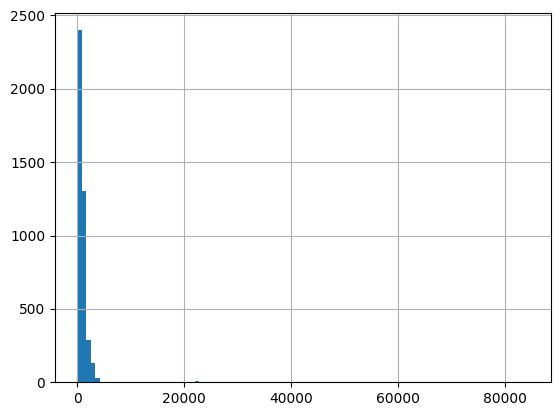

In [14]:
df_clean['samplesize'].hist(bins=100)

<Axes: >

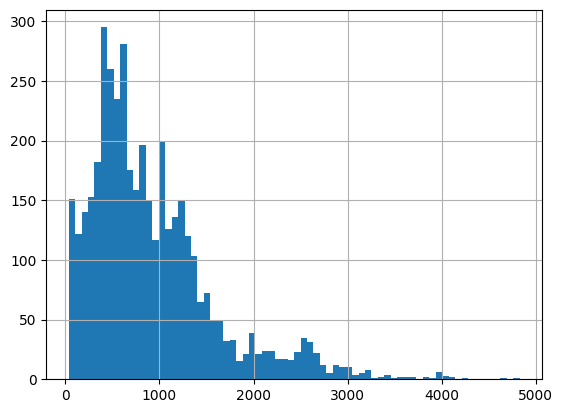

In [12]:
df_clean.loc[(df_clean['samplesize'] <= 5005)]['samplesize'].hist(bins=70)

<Axes: >

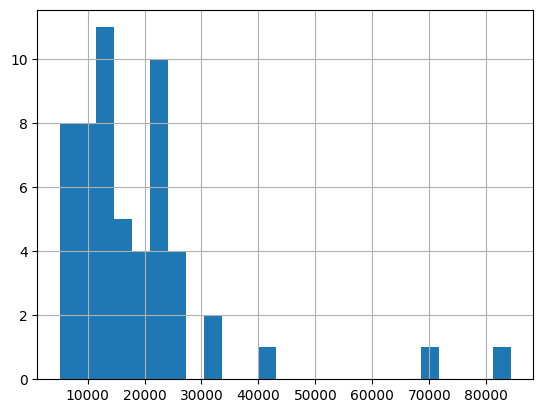

In [10]:
df_clean.loc[(df_clean['samplesize'] > 5005)]['samplesize'].hist(bins=25)
# df_clean['samplesize'].hist(bins=1000)

In [ ]:
jnb = jenkspy.JenksNaturalBreaks(75)
jnb.fit(df_clean.loc[(df_clean['samplesize'] <= 5005)]['samplesize'])
#print(jnb.breaks_)
median_list = []
group_list = []
for group_sample in jnb.groups_:
  median_list.append(np.median(group_sample))
  group_list.append(np.unique(group_sample))
  #print(len(group_sample), np.median(group_sample),"\t", np.median(group_sample)-np.min(group_sample), np.max(group_sample)-np.median(group_sample))

jnb2 = jenkspy.JenksNaturalBreaks(25)
jnb2.fit(df_clean.loc[(df_clean['samplesize'] > 5005)]['samplesize'])
#print(jnb2.breaks_)
for group_sample in jnb2.groups_:
  median_list.append(np.median(group_sample))
  group_list.append(np.unique(group_sample))
  #print(len(group_sample), np.median(group_sample),"\t", np.median(group_sample)-np.min(group_sample), np.max(group_sample)-np.median(group_sample))

In [26]:
def samplesize_smooth(x):
  for i in range(100):
    if x in group_list[i]:
      return median_list[i]

In [27]:
df_clean["samplesize"] = df_clean.apply (lambda x: samplesize_smooth(x["samplesize"]), axis=1)

In [49]:
df_clean[df_clean['samplesize'].isna()]

,state,startdate,enddate,pollster,grade,samplesize,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,pop_type__a,pop_type__lv,pop_type__rv,pop_type__v


In [48]:
a = df_clean.loc[df_clean['state'] == "Illinois"]["samplesize"].mode()[1]
df_clean['samplesize'] = np.where(df_clean['samplesize'].isna(), a, df_clean['samplesize'])

In [63]:
a = np.mean(df_clean["rawpoll_johnson"])
df_clean['rawpoll_johnson'] = np.where(df_clean['rawpoll_johnson'].isna(), a, df_clean['rawpoll_johnson'])
a = np.mean(df_clean["adjpoll_johnson"])
df_clean['adjpoll_johnson'] = np.where(df_clean['adjpoll_johnson'].isna(), a, df_clean['adjpoll_johnson'])

In [62]:
np.mean(df_clean["rawpoll_johnson"])

7.381739907109681

In [51]:
df_clean['rawpoll_mcmullin'] = np.where(df_clean['rawpoll_mcmullin'].isna(), 0, df_clean['rawpoll_mcmullin'])
df_clean['adjpoll_mcmullin'] = np.where(df_clean['adjpoll_mcmullin'].isna(), 0, df_clean['adjpoll_mcmullin'])

---------------------------------------------------

In [64]:
df_clean.isna().sum()

state               0
startdate           0
enddate             0
pollster            0
grade               0
samplesize          0
rawpoll_clinton     0
rawpoll_trump       0
rawpoll_johnson     0
rawpoll_mcmullin    0
adjpoll_clinton     0
adjpoll_trump       0
adjpoll_johnson     0
adjpoll_mcmullin    0
pop_type__a         0
pop_type__lv        0
pop_type__rv        0
pop_type__v         0
dtype: int64

In [65]:
from google.colab import files
df_clean.to_csv('polls_us_election_2016_clean.csv', encoding = 'utf-8-sig') 
files.download('polls_us_election_2016_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>